# U.S. Fish & Wildlife Service

### Data Gathering

In [1]:
import pandas as pd

In [2]:
# All plants and animals (9612 records, 15 columns)
species = pd.read_html('../Data/fws.html', header=0)[0]
print(species.shape)
species.head()

(9612, 15)


,Scientific Name,Common Name,Inverted Common Name,Species Code,Population Code,CurrentDistribution,Family,First Listed,Species Group,Lead Region,Federal Listing Status,Regions ofOccurrence,U.S. or ForeignListed,Vertebrate/Invertebrate/Plant,Where Listed
0,Abies fraseri,Fraser fir,"Fir, Fraser",R00B,P01,"NC, VA;",Pinaceae,NaN,Conifers and Cycads,4,Not Listed,"4, 5",US,P,Wherever found
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Fir, Guatemalan (=pinabete)",R003,P01,"Mexico, Honduras, Guatemala, El Salvador",Pinaceae,"Dec 10, 1979",Conifers and Cycads,Foreign,Threatened,NaN,Foreign,P,Wherever found
2,Ablautus schlingeri,Oso Flaco robber fly,"Robber fly, Oso Flaco",I0O3,I01,CA;,Asilidae,NaN,Insects,1,Not Listed,8,US,I,Wherever found
3,Abronia alpina,Ramshaw Meadows sand-verbena,"Sand-verbena, Ramshaw Meadows",Q009,P01,CA;,Nyctaginaceae,NaN,Flowering Plants,8,Not Listed,8,US,P,Wherever found
4,Abronia ammophila,Yellowstone Sand Verbena,Verbena Yellowstone Sand,Q3LO,P01,NaN,Nyctaginaceae,NaN,Flowering Plants,6,Not Listed,NaN,US,P,Wherever found


### Feature Selection

In [3]:
# print unique values in each column
for column in species.columns:
    print(column + ': ' + str(len(species[column].unique())))

Scientific Name: 9318
Common Name: 7129
Inverted Common Name: 7108
Species Code: 9430
Population Code: 20
CurrentDistribution: 1678
Family: 900
First Listed: 638
Species Group: 20
Lead Region: 12
Federal Listing Status: 19
Regions ofOccurrence: 58
U.S. or ForeignListed: 4
Vertebrate/Invertebrate/Plant: 3
Where Listed: 322


In [4]:
# drop uninformative columns
species = species.drop(['Inverted Common Name',
                        'Species Code',
                        'Population Code',
                        'Family',
                        'First Listed',
                        'Regions ofOccurrence',
                        'U.S. or ForeignListed',
                        'Where Listed'], axis=1)

In [5]:
print(species.shape)
species.head()

(9612, 7)


,Scientific Name,Common Name,CurrentDistribution,Species Group,Lead Region,Federal Listing Status,Vertebrate/Invertebrate/Plant
0,Abies fraseri,Fraser fir,"NC, VA;",Conifers and Cycads,4,Not Listed,P
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Mexico, Honduras, Guatemala, El Salvador",Conifers and Cycads,Foreign,Threatened,P
2,Ablautus schlingeri,Oso Flaco robber fly,CA;,Insects,1,Not Listed,I
3,Abronia alpina,Ramshaw Meadows sand-verbena,CA;,Flowering Plants,8,Not Listed,P
4,Abronia ammophila,Yellowstone Sand Verbena,NaN,Flowering Plants,6,Not Listed,P


### Missing Data

In [6]:
import missingno as msno

Scientific Name                    0
Common Name                        0
CurrentDistribution              860
Species Group                      0
Lead Region                       73
Federal Listing Status             0
Vertebrate/Invertebrate/Plant      0
dtype: int64


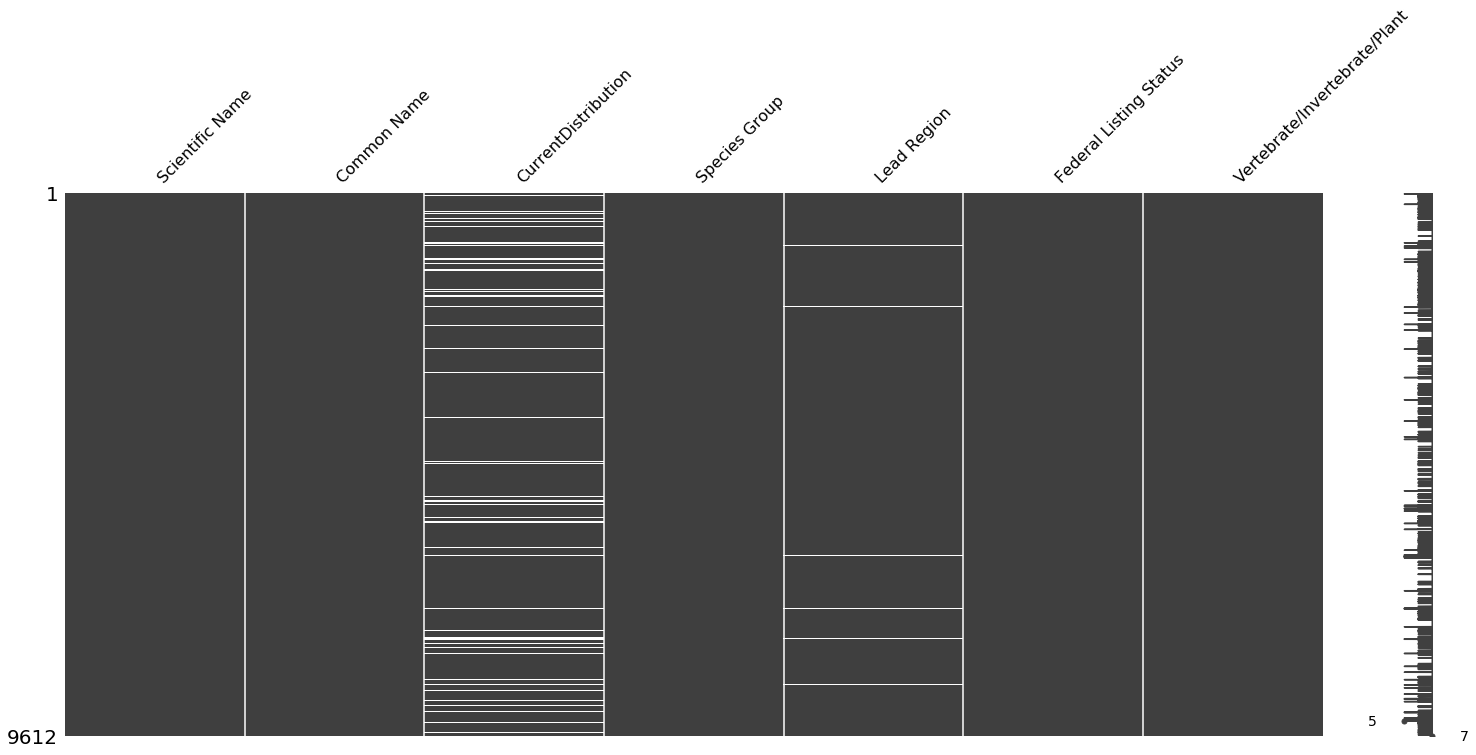

In [7]:
# check species data for null values
print(species.isnull().sum())

# visualize null values
msno.matrix(species)

In [8]:
# ~10% of records that do not have geographic information
print(species.isnull().sum().sum() / species.shape[0])

# drop records without geographic information
species = species.dropna()

0.0970661672908864


In [9]:
print(species.shape)
species.head()

(8751, 7)


,Scientific Name,Common Name,CurrentDistribution,Species Group,Lead Region,Federal Listing Status,Vertebrate/Invertebrate/Plant
0,Abies fraseri,Fraser fir,"NC, VA;",Conifers and Cycads,4,Not Listed,P
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Mexico, Honduras, Guatemala, El Salvador",Conifers and Cycads,Foreign,Threatened,P
2,Ablautus schlingeri,Oso Flaco robber fly,CA;,Insects,1,Not Listed,I
3,Abronia alpina,Ramshaw Meadows sand-verbena,CA;,Flowering Plants,8,Not Listed,P
6,Abronia ammphila,[Unnamed] sand-verbena,WY;,Flowering Plants,6,Not Listed,P


### Feature Cleaning

In [10]:
# unique species groups
species.groupby('Species Group')['Species Group'].count()

Species Group
Amphibians                   138
Annelid Worms                  2
Arachnids                     50
Birds                        475
Clams                        203
Conifers and Cycads           22
Corals                         3
Crustaceans                  230
Ferns and Allies              95
Fishes                       429
Flatworms and Roundworms       8
Flowering Plants            4584
Hydroids                       1
Insects                     1063
Lichens                       17
Mammals                      660
Millipedes                     1
Reptiles                     257
Snails                       506
Sponges                        7
Name: Species Group, dtype: int64

In [11]:
# unique species types
species.groupby('Vertebrate/Invertebrate/Plant')['Vertebrate/Invertebrate/Plant'].count()

Vertebrate/Invertebrate/Plant
I    2074
P    4718
V    1959
Name: Vertebrate/Invertebrate/Plant, dtype: int64

In [12]:
# unique current distribution
print(species.groupby('Lead Region')['Lead Region'].count())

# drop species in foreign geographic regions
species = species[species['Lead Region'] != 'Foreign']

# drop species in geographic region 9 (not documented)
species = species[species['Lead Region'] != '9']

Lead Region
1          3531
2           989
3           211
4          1804
5           355
6           615
7            76
8           480
9             1
Foreign     624
NMFS         65
Name: Lead Region, dtype: int64


In [13]:
# list of US states
state_abbrevs = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# stack records with multiple US states in current distribution
species_stack = pd.DataFrame(columns=species.columns)

for abbrev in state_abbrevs:
    state = species[species['CurrentDistribution'].str.contains(abbrev)]
    state = state.assign(StateDistribution=abbrev)
    species_stack = species_stack.append(state, ignore_index=True, sort=False)
    
# drop current distribution
species = species_stack.drop(['CurrentDistribution'], axis=1)

In [14]:
# unique federal listing status
print(species.groupby('Federal Listing Status')['Federal Listing Status'].count())

# keep records for endangered, not listed and threatened species
species = species[(species['Federal Listing Status'] == 'Endangered') |
                  (species['Federal Listing Status'] == 'Not Listed') |
                  (species['Federal Listing Status'] == 'Threatened')]

Federal Listing Status
Candidate                                                    34
Endangered                                                 1901
Experimental Population, Non-Essential                      260
Extinction                                                   17
Not Listed                                                 9074
Original Data in Error - Act Amendment                        1
Original Data in Error - New Information Discovered           9
Original Data in Error - Not a listable entity                7
Original Data in Error - Taxonomic Revision                   9
Proposed Endangered                                           3
Proposed Similarity of Appearance to a Threatened Taxon       1
Proposed Threatened                                          62
Recovery                                                     83
Similarity of Appearance to a Threatened Taxon               40
Threatened                                                  817
Under Review in t

In [15]:
# drop duplicate rows
species = species.drop_duplicates()

In [16]:
print(species.shape)
species.head()

(11737, 7)


,Scientific Name,Common Name,Species Group,Lead Region,Federal Listing Status,Vertebrate/Invertebrate/Plant,StateDistribution
0,Accipiter gentilis,Northern goshawk,Birds,2,Not Listed,V,AL
1,Acipenser fulvescens,Lake sturgeon,Fishes,3,Not Listed,V,AL
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Fishes,4,Threatened,V,AL
3,Agarodes alabamensis,[Unnamed] caddisfly,Insects,4,Not Listed,I,AL
4,Agrimonia incisa,Incised groovebur,Flowering Plants,4,Not Listed,P,AL


# Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [18]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11737 entries, 0 to 13390
Data columns (total 7 columns):
Scientific Name                  11737 non-null object
Common Name                      11737 non-null object
Species Group                    11737 non-null object
Lead Region                      11737 non-null object
Federal Listing Status           11737 non-null object
Vertebrate/Invertebrate/Plant    11737 non-null object
StateDistribution                11737 non-null object
dtypes: object(7)
memory usage: 733.6+ KB


In [19]:
species.describe()

,Scientific Name,Common Name,Species Group,Lead Region,Federal Listing Status,Vertebrate/Invertebrate/Plant,StateDistribution
count,11737,11737,11737,11737,11737,11737,11737
unique,7116,5217,20,9,3,3,50
top,Accipiter gentilis,No common name,Flowering Plants,1,Not Listed,P,CA
freq,44,1807,6288,3904,9040,6492,1697


In [20]:
species.columns = ['Scientific Name',
                   'Common Name',
                   'Group',
                   'Region',
                   'Federal Listing Status',
                   'VIP',
                   'State']

In [21]:
species.head()

,Scientific Name,Common Name,Group,Region,Federal Listing Status,VIP,State
0,Accipiter gentilis,Northern goshawk,Birds,2,Not Listed,V,AL
1,Acipenser fulvescens,Lake sturgeon,Fishes,3,Not Listed,V,AL
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Fishes,4,Threatened,V,AL
3,Agarodes alabamensis,[Unnamed] caddisfly,Insects,4,Not Listed,I,AL
4,Agrimonia incisa,Incised groovebur,Flowering Plants,4,Not Listed,P,AL


In [35]:
species.groupby('Federal Listing Status').sum()

,Group_Amphibians,Group_Annelid Worms,Group_Arachnids,Group_Birds,Group_Clams,Group_Conifers and Cycads,Group_Corals,Group_Crustaceans,Group_Ferns and Allies,Group_Fishes,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
Federal Listing Status,,,,,,,,,,,,,,,,,,,,,
Endangered,23.0,0.0,14.0,140.0,344.0,2.0,0.0,28.0,31.0,164.0,...,9.0,85.0,79.0,22.0,54.0,4.0,15.0,15.0,22.0,9.0
Not Listed,103.0,4.0,36.0,432.0,108.0,16.0,0.0,190.0,122.0,467.0,...,31.0,225.0,420.0,384.0,178.0,35.0,180.0,75.0,99.0,111.0
Threatened,17.0,0.0,0.0,109.0,45.0,2.0,2.0,8.0,5.0,102.0,...,6.0,23.0,22.0,20.0,22.0,4.0,28.0,11.0,8.0,10.0


# Feature Engineering

In [22]:
#create dummy variables
species = pd.get_dummies(data=species, columns=['Group', 'Region', 'VIP', 'State'])
print(species.shape)
species.head()

(11737, 85)


,Scientific Name,Common Name,Federal Listing Status,Group_Amphibians,Group_Annelid Worms,Group_Arachnids,Group_Birds,Group_Clams,Group_Conifers and Cycads,Group_Corals,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,Accipiter gentilis,Northern goshawk,Not Listed,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acipenser fulvescens,Lake sturgeon,Not Listed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Threatened,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agarodes alabamensis,[Unnamed] caddisfly,Not Listed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agrimonia incisa,Incised groovebur,Not Listed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Create target and feature variables
y = species['Federal Listing Status']
X = species.drop(['Federal Listing Status', 'Scientific Name', 'Common Name'], axis = 1)

Federal Listing Status
Endangered    1899
Not Listed    9040
Threatened     798
Name: Federal Listing Status, dtype: int64
Endangered: 0.16179602964982534
Not Listed: 0.7702138536252876
Threatened: 0.06799011672488711


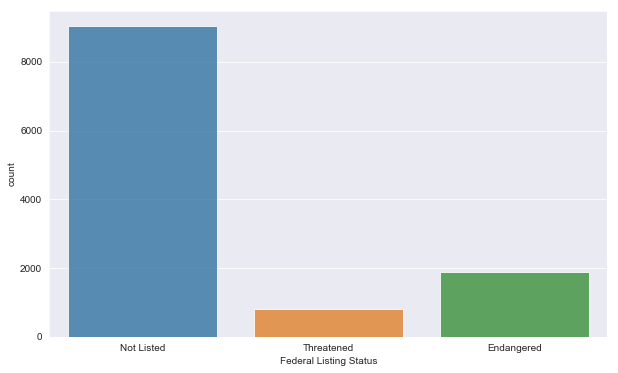

In [57]:
# federal listing status
print(species.groupby('Federal Listing Status')['Federal Listing Status'].count())
print('Endangered: ' + str((species['Federal Listing Status'] == 'Endangered').sum() / species.shape[0]))
print('Not Listed: ' + str((species['Federal Listing Status'] == 'Not Listed').sum() / species.shape[0]))
print('Threatened: ' + str((species['Federal Listing Status'] == 'Threatened').sum() / species.shape[0]))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(species['Federal Listing Status'], alpha=0.8)

# Data Scaling

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# federal listing status
print('Test Data')
print('Endangered: ' + str((y_test == 'Endangered').sum() / y_test.count()))
print('Not Listed: ' + str((y_test == 'Not Listed').sum() / y_test.count()))
print('Threatened: ' + str((y_test == 'Threatened').sum() / y_test.count()))

Test Data
Endangered: 0.17120954003407154
Not Listed: 0.7640545144804088
Threatened: 0.06473594548551959


# Class Imbalance

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np

In [27]:
# DummyClassifier to predict majority class
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred_train = dummy.predict(X_train)
dummy_pred_test = dummy.predict(X_test)

# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train, dummy_pred_train))
print('Train F1 score: ', f1_score(y_train, dummy_pred_train, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred_test))
print('Test F1 score: ', f1_score(y_test, dummy_pred_test, average='weighted'))

Train Accuracy score:  0.7717541804239003
Train F1 score:  0.6723331279052096
Test Accuracy score:  0.7640545144804088
Test F1 score:  0.6618608396802769


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
log_reg_clf = LogisticRegression(solver='liblinear')
log_reg_clf.fit(X_train, y_train)
y_pred_train = log_reg_clf.predict(X_train)
y_pred_test = log_reg_clf.predict(X_test)

# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train, y_pred_train))
print('Train F1 score: ', f1_score(y_train, y_pred_train, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))
print('Test F1 score: ', f1_score(y_test, y_pred_test, average='weighted'))

Train Accuracy score:  0.8097773990840345
Train F1 score:  0.7674212416272476
Test Accuracy score:  0.8015332197614992
Test F1 score:  0.7568932885591846


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


9389
Endangered: 0.15944190009585685
Not Listed: 0.7717541804239003
Threatened: 0.06880391948024284


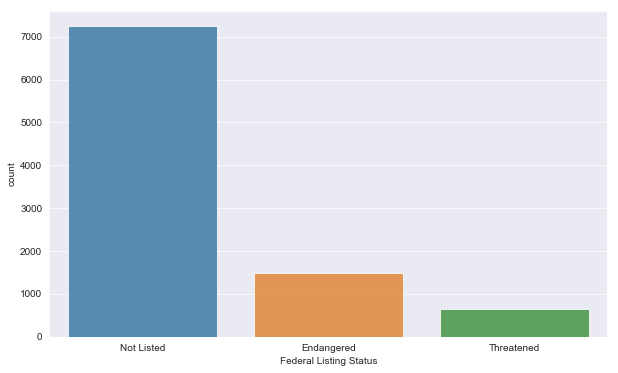

In [62]:
# federal listing status
print(y_train.count())
print('Endangered: ' + str((y_train == 'Endangered').sum() / y_train.count()))
print('Not Listed: ' + str((y_train == 'Not Listed').sum() / y_train.count()))
print('Threatened: ' + str((y_train == 'Threatened').sum() / y_train.count()))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train, alpha=0.8)

In [60]:
keys = list(y_train.unique())
values = np.ones((3), dtype=int) * (y_train == 'Not Listed').sum()
sample_ratio = dict(zip(keys, values))
sample_ratio

{'Not Listed': 7246, 'Endangered': 7246, 'Threatened': 7246}

21738
Endangered: 0.3333333333333333
Not Listed: 0.3333333333333333
Threatened: 0.3333333333333333


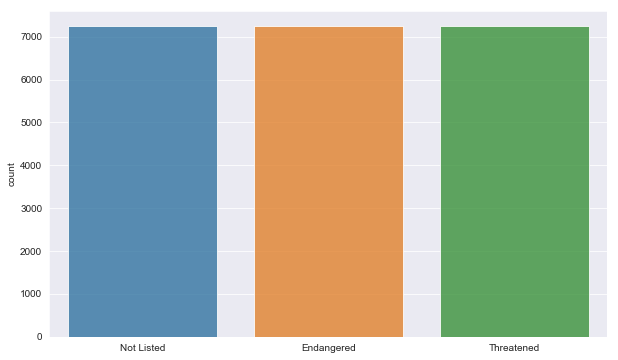

In [66]:
species['Federal Listing Status'].unique()

sm = SMOTE(ratio=sample_ratio)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

# federal listing status
print(len(y_train_sm))
print('Endangered: ' + str((y_train_sm == 'Endangered').sum() / len(y_train_sm)))
print('Not Listed: ' + str((y_train_sm == 'Not Listed').sum() / len(y_train_sm)))
print('Threatened: ' + str((y_train_sm == 'Threatened').sum() / len(y_train_sm)))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train_sm, alpha=0.8)

In [72]:
# DummyClassifier to predict majority class
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred_train_sm = dummy.predict(X_train_sm)
dummy_pred_test = dummy.predict(X_test)

# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train_sm, dummy_pred_train_sm))
print('Train F1 score: ', f1_score(y_train_sm, dummy_pred_train_sm, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred_test))
print('Test F1 score: ', f1_score(y_test, dummy_pred_test, average='weighted'))

Train Accuracy score:  0.3333333333333333
Train F1 score:  0.16666666666666666
Test Accuracy score:  0.7640545144804088
Test F1 score:  0.6618608396802769


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
log_reg_clf = LogisticRegression(solver='liblinear')
log_reg_clf.fit(X_train_sm, y_train_sm)
y_pred_train_sm = log_reg_clf.predict(X_train_sm)
y_pred_test = log_reg_clf.predict(X_test)

# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train_sm, y_pred_train_sm))
print('Train F1 score: ', f1_score(y_train_sm, y_pred_train_sm, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))
print('Test F1 score: ', f1_score(y_test, y_pred_test, average='weighted'))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train Accuracy score:  0.6645965590210691
Train F1 score:  0.6590955197669709
Test Accuracy score:  0.7299829642248722
Test F1 score:  0.7412810813432027


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Model Fitting

In [30]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(C=1e12)

# Model Evaluation